In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import read_json

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ls ../dataset/topagent_dataset/100_episode/ | head -n 3

10330130.json
10372816.json
10528016.json


In [3]:
fn = '../dataset/topagent_dataset/100_episode/10330130.json'
game = read_json(fn)

In [4]:
def parse_game(game):
    thresholds = game['steps'][0][0]['observation']['thresholds']
    thresholds = [t/100. for t in thresholds]
    a0_moves, a1_moves = [], []
    for pair_a in game['steps']:
        a0, a1 = pair_a
        a0_move, a1_move = a0['action'], a1['action']
        a0_moves.append(a0_move)
        a1_moves.append(a1_move)
    
    a0_reward = game['steps'][-1][0]['reward']
    a1_reward = game['steps'][-1][1]['reward']
    return thresholds, a0_moves, a1_moves, a0_reward, a1_reward

In [5]:
thresholds, a0_moves, a1_moves, a0_reward, a1_reward = parse_game(game)

### 1. Write Helper for Visualization

In [6]:
def plot_movements_over_time(thresholds, a0_moves, a1_moves, a0_name = 'Agent 1', a1_name = 'Agent 2'):
    ts = range(len(a0_moves))
    thresholds = [t * len(ts) for t in thresholds]
    
    fig, ax = plt.subplots(figsize = (24, 12))

    pts1 = ax.scatter(x = ts, y = a0_moves, alpha = 0.5)
    pts2 = ax.scatter(x = ts, y = a1_moves, alpha = 0.5)
    bh = ax.barh(range(len(thresholds)), thresholds, 
                 align = 'center', alpha = 0.4, color = 'lightgrey')

    ax.legend((pts1, pts2, bh), (a1_name, a0_name, 'Initial Thresholds'), loc='upper right')
    ax.set_title('Movements over Time')
    ax.set_ylim(bottom = 0, top = 110)
    ax.set_xlim(left = 0, right = len(ts))
    plt.tight_layout()
    
    return fig, ax

### 2a. Visualize One Game

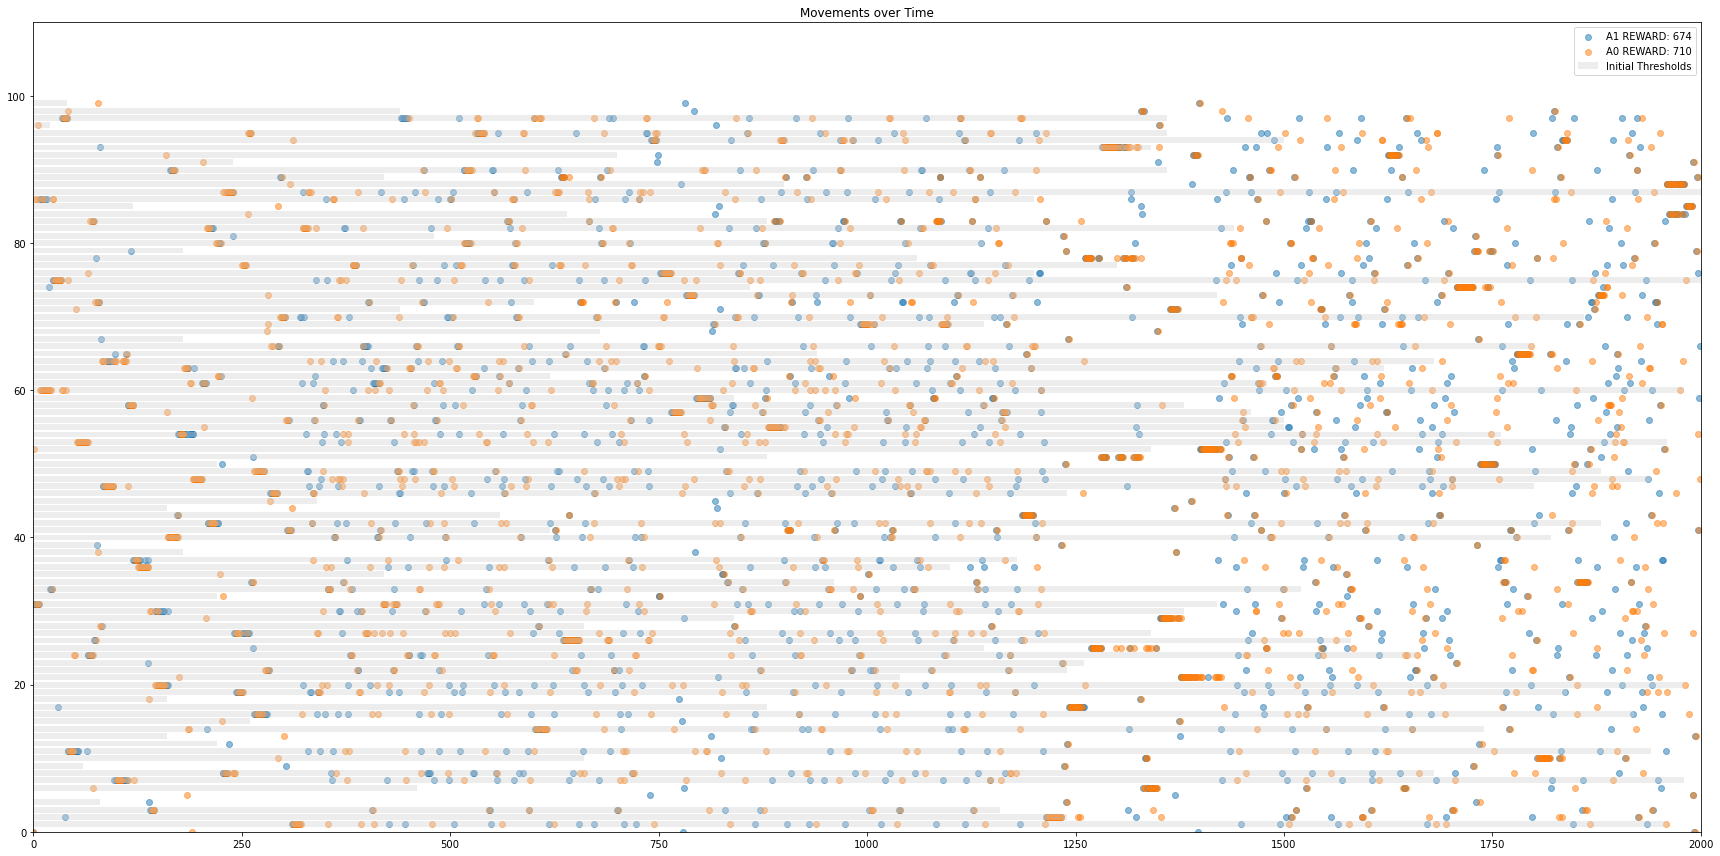

In [7]:
fig, ax = plot_movements_over_time(
    thresholds, a0_moves, a1_moves, 
    a0_name = f'A0 REWARD: {a0_reward}', 
    a1_name = f'A1 REWARD: {a1_reward}')

### 2b. Visualize Another Game

In [8]:
fn2 = '../dataset/topagent_dataset/100_episode/10528016.json'
game = read_json(fn2)

In [9]:
thresholds, a0_moves, a1_moves, a0_reward, a1_reward = parse_game(game)

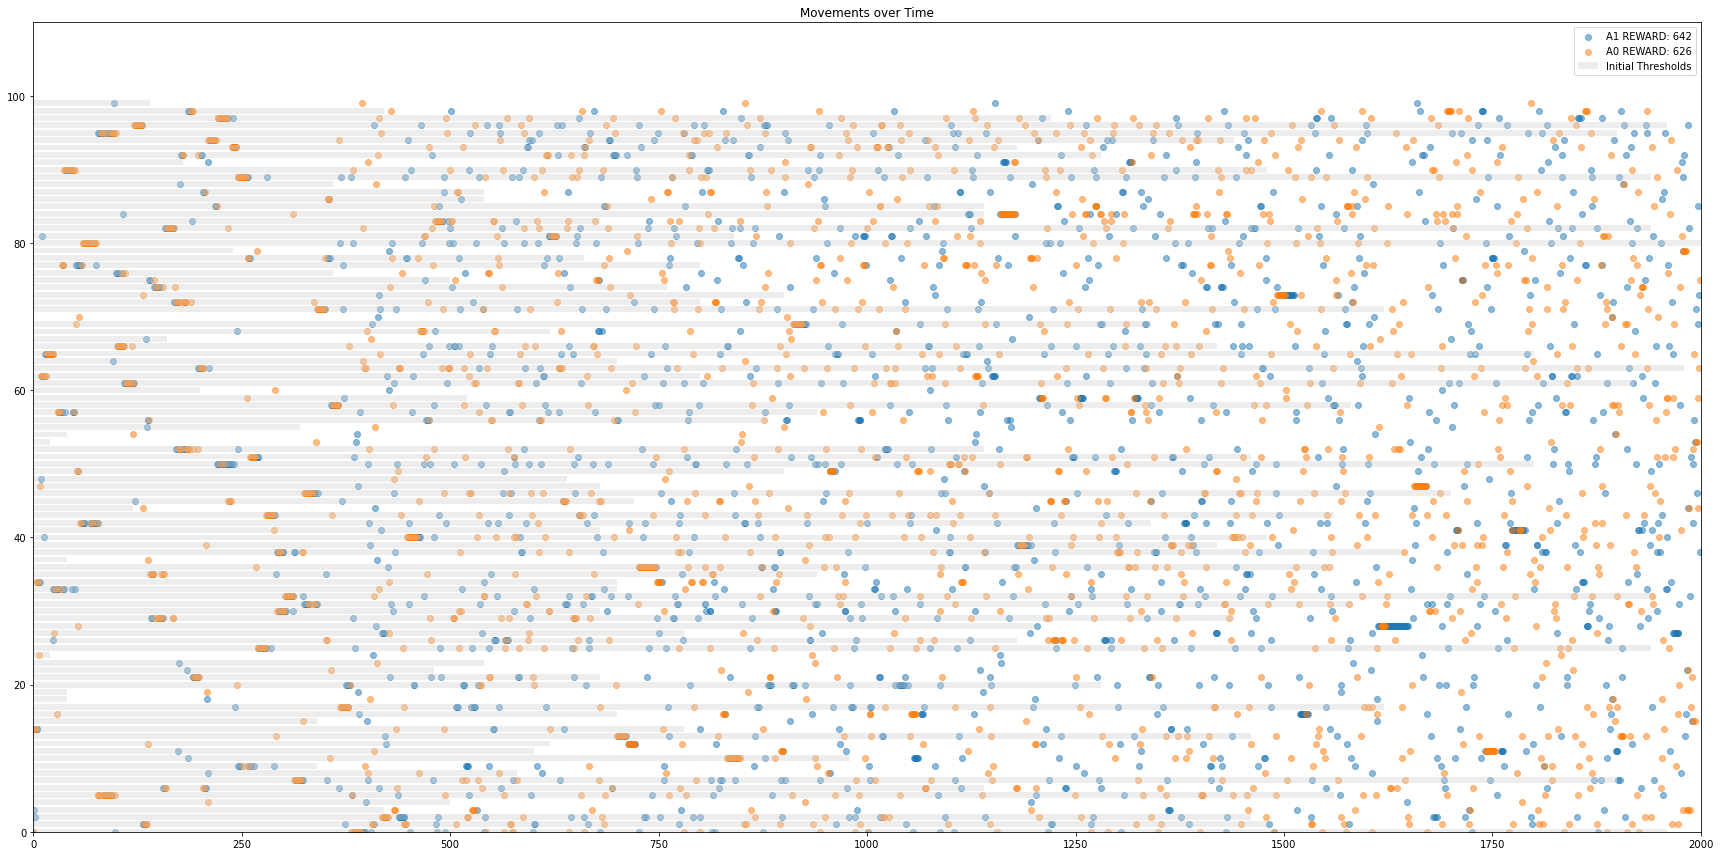

In [10]:
fig, ax = plot_movements_over_time(
    thresholds, a0_moves, a1_moves, 
    a0_name = f'A0 REWARD: {a0_reward}', 
    a1_name = f'A1 REWARD: {a1_reward}')

### How to Requests Episode?

In [11]:
import requests

epid = 10372816

base_url = "https://www.kaggle.com/requests/EpisodeService/"
get_url = base_url + "GetEpisodeReplay"
re = requests.post(get_url, json = {"EpisodeId": int(epid)})

In [12]:
out = re.json()

In [13]:
import json
game_json = json.loads(out['result']['replay'])

In [14]:
game_json['steps']

[[{'action': 0,
   'info': {},
   'observation': {'agentIndex': 0,
    'lastActions': [],
    'remainingOverageTime': 60,
    'reward': 0,
    'step': 0,
    'thresholds': [12,
     77,
     55,
     52,
     64,
     38,
     39,
     97,
     23,
     37,
     78,
     57,
     97,
     27,
     36,
     25,
     70,
     72,
     24,
     91,
     41,
     66,
     75,
     32,
     49,
     55,
     75,
     66,
     7,
     7,
     97,
     59,
     0,
     80,
     1,
     87,
     13,
     81,
     11,
     10,
     94,
     15,
     91,
     60,
     70,
     85,
     27,
     39,
     54,
     55,
     99,
     67,
     49,
     2,
     4,
     68,
     3,
     93,
     3,
     38,
     22,
     55,
     8,
     24,
     86,
     65,
     13,
     98,
     22,
     64,
     22,
     73,
     71,
     59,
     30,
     5,
     2,
     75,
     53,
     17,
     93,
     52,
     74,
     27,
     99,
     4,
     99,
     77,
     66,
     65,
     30,
     67,
     77,
     95

In [15]:
def request_episode(episode_id):
    base_url = "https://www.kaggle.com/requests/EpisodeService/"
    get_url = base_url + "GetEpisodeReplay"
    res = requests.post(get_url, json = {"EpisodeId": episode_id})
    episode = json.loads(res.json()['result']['replay'])
    return episode

### End to End Process

In [16]:
#https://www.kaggle.com/c/santa-2020/submissions?dialog=episodes-episode-12466954

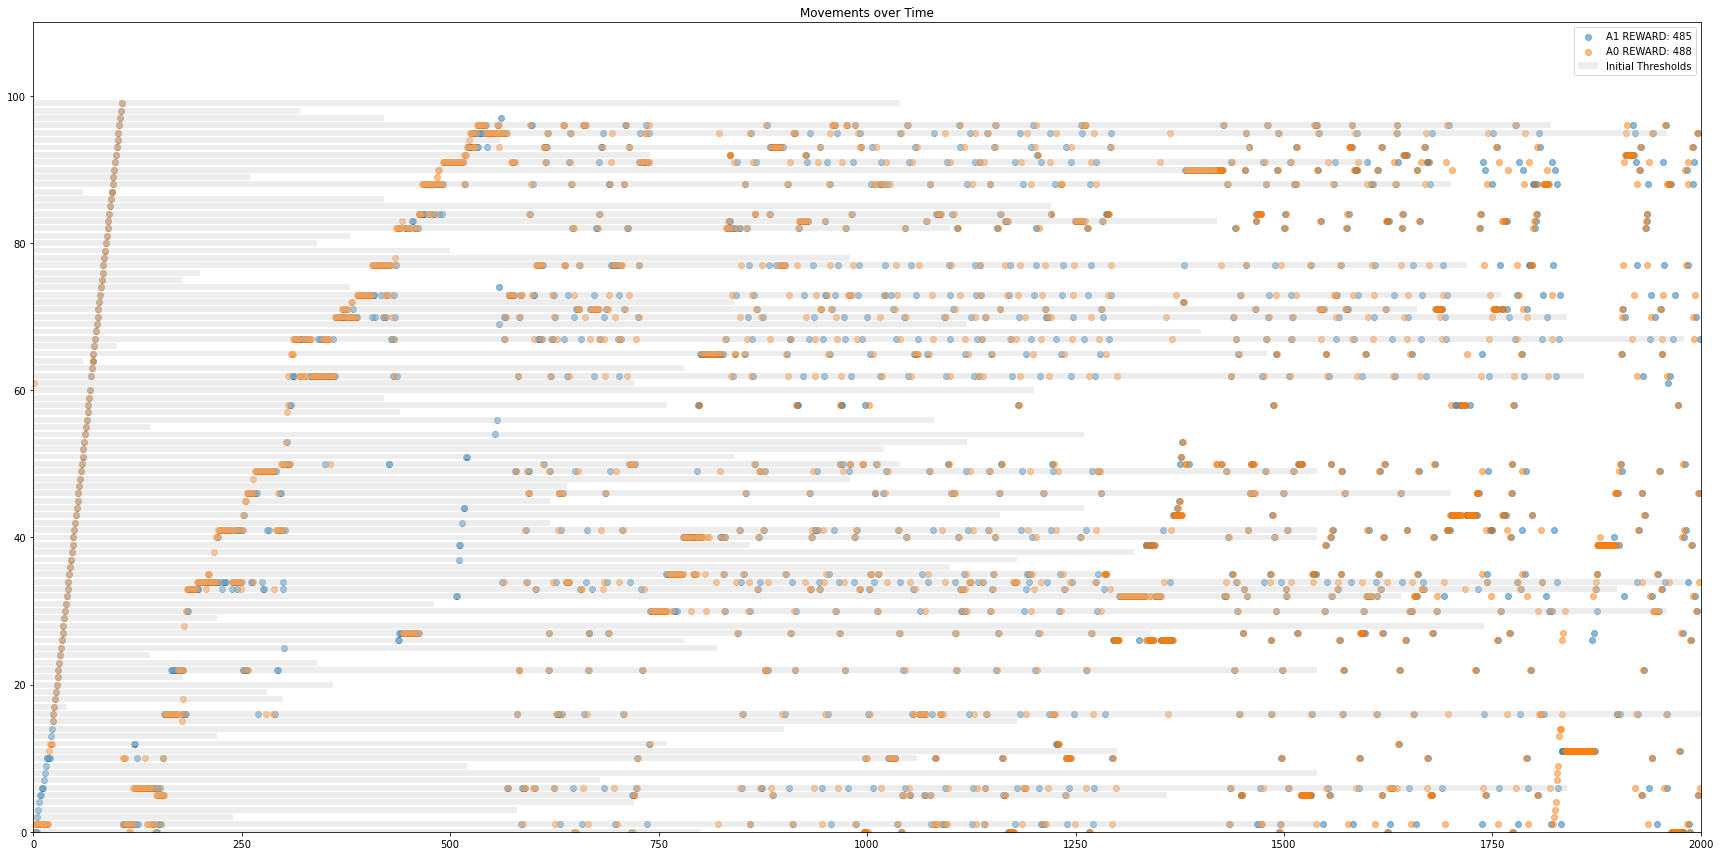

In [18]:
epid = 12906850
episode = request_episode(epid)
thresholds, a0_moves, a1_moves, a0_reward, a1_reward = parse_game(episode)
fig, ax = plot_movements_over_time(
    thresholds, a0_moves, a1_moves, 
    a0_name = f'A0 REWARD: {a0_reward}', 
    a1_name = f'A1 REWARD: {a1_reward}')

In [29]:
np.stack([a0_moves[75:100], a1_moves[75:100]])

array([[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92],
       [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92]])

In [26]:
a0_moves[0:3]

[0, 0, 0]

In [28]:
a1_moves[0:3]

[0, 61, 1]

In [30]:
a0_moves[0:3]

[0, 0, 0]